In [1]:
import os
import pandas as pd
from data.paths import MIMIC_EYE_PATH

In [2]:
df = pd.read_csv(os.path.join("spreadsheets", "reflacx_eye.csv"))
df.head(5)

,Unnamed: 0,index,id,dicom_id,subject_id,stay_id,study_id,split,eye_tracking_data_discarded,image_path,...,Enlarged Cardiomediastinum_chexpert,Fracture_chexpert,Lung Lesion_chexpert,Lung Opacity_chexpert,No Finding_chexpert,Pleural Effusion_chexpert,Pleural Other_chexpert,Pneumonia_chexpert,Pneumothorax_chexpert,Support Devices_chexpert
0,0,0,P102R108387,34cedb74-d0996b40-6d218312-a9174bea-d48dc033,18111516,32067002.0,55032240,train,False,{XAMI_MIMIC_PATH}\patient_18111516\CXR-JPG\s55...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,1.0
1,1,1,P102R379837,34cedb74-d0996b40-6d218312-a9174bea-d48dc033,18111516,32067002.0,55032240,test,False,{XAMI_MIMIC_PATH}\patient_18111516\CXR-JPG\s55...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,1.0
2,2,2,P102R558314,34cedb74-d0996b40-6d218312-a9174bea-d48dc033,18111516,32067002.0,55032240,train,False,{XAMI_MIMIC_PATH}\patient_18111516\CXR-JPG\s55...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,1.0
3,3,3,P102R765317,34cedb74-d0996b40-6d218312-a9174bea-d48dc033,18111516,32067002.0,55032240,train,False,{XAMI_MIMIC_PATH}\patient_18111516\CXR-JPG\s55...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,1.0
4,4,4,P102R915878,34cedb74-d0996b40-6d218312-a9174bea-d48dc033,18111516,32067002.0,55032240,val,False,{XAMI_MIMIC_PATH}\patient_18111516\CXR-JPG\s55...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,1.0


In [3]:
df.columns

Index(['Unnamed: 0', 'index', 'id', 'dicom_id', 'subject_id', 'stay_id',
       'study_id', 'split', 'eye_tracking_data_discarded', 'image_path',
       'bbox_path', 'fixation_path', 'StudyDate', 'StudyDateTime', 'StudyTime',
       'in_eye_gaze', 'in_reflacx', 'image', 'image_size_x', 'image_size_y',
       'ViewPosition', 'Airway wall thickening', 'Atelectasis',
       'Consolidation', 'Enlarged cardiac silhouette', 'Fibrosis', 'Fracture',
       'Groundglass opacity', 'Other', 'Pneumothorax', 'Pulmonary edema',
       'Quality issue', 'Support devices', 'Wide mediastinum',
       'Abnormal mediastinal contour', 'Acute fracture', 'Enlarged hilum',
       'Hiatal hernia', 'High lung volume / emphysema',
       'Interstitial lung disease', 'Lung nodule or mass',
       'Pleural abnormality', 'Atelectasis_negbio', 'Cardiomegaly_negbio',
       'Consolidation_negbio', 'Edema_negbio',
       'Enlarged Cardiomediastinum_negbio', 'Fracture_negbio',
       'Lung Lesion_negbio', 'Lung Opacity

In [4]:
cxr_meta_df = pd.read_csv(os.path.join(MIMIC_EYE_PATH,"spreadsheets",  "cxr_meta.csv"))

In [5]:
in_both_df = cxr_meta_df[cxr_meta_df.in_reflacx & cxr_meta_df.in_eye_gaze]

In [6]:
in_both_studyids = in_both_df['study_id']

In [7]:
list(in_both_studyids)

[54420337,
 52718721,
 53621943,
 51358448,
 56277244,
 57904568,
 53848831,
 59570639,
 55024274,
 58125581]

In [8]:
in_both_df

,Unnamed: 0,dicom_id,subject_id,study_id,PerformedProcedureStepDescription,ViewPosition,Rows,Columns,StudyDate,StudyTime,ProcedureCodeSequence_CodeMeaning,ViewCodeSequence_CodeMeaning,PatientOrientationCodeSequence_CodeMeaning,in_eye_gaze,in_reflacx,StudyDateTime,stay_id
346,36880,9c452d99-a2e14f15-8458865f-92178374-a9e29b76,11004477,54420337,CHEST (PA AND LAT),PA,3056,2544,21570321,125119.328,CHEST (PA AND LAT),postero-anterior,Erect,True,True,2.157032e+13,37046290.0
1401,149309,1793e4df-5b1fd824-cb5d0f43-bc3531f4-40cf6c54,13977589,52718721,CHEST (PA AND LAT),PA,2544,3056,21560714,195753.015,CHEST (PA AND LAT),postero-anterior,Erect,True,True,2.156071e+13,35250052.0
1570,168387,5c61db80-672e0874-ba236081-53d2f8ad-ab8d2efb,14492434,53621943,CHEST (PA AND LAT),PA,3056,2544,21621123,163419.796,CHEST (PA AND LAT),postero-anterior,Erect,True,True,2.162112e+13,35827518.0
2086,217451,cb1f25ef-87f09c2a-0f656ffe-f63022ab-8b305520,15752803,51358448,CHEST (PA AND LAT),PA,3056,2544,21670428,44745.671,CHEST (PA AND LAT),postero-anterior,Erect,True,True,2.167043e+12,NaN
2128,221046,d8b6b619-9e181de2-c46adb2d-08194ead-eefd7108,15857729,56277244,CHEST (PA AND LAT),PA,3056,2532,21471130,201829.890,CHEST (PA AND LAT),postero-anterior,Erect,True,True,2.147113e+13,35608984.0
2492,257300,a28cb755-423caf3b-13530617-03aaff16-5ca9a2b3,16831446,57904568,CHEST (PA AND LAT),PA,3056,2544,21250708,145552.718,CHEST (PA AND LAT),postero-anterior,Erect,True,True,2.125071e+13,36647749.0
2561,264640,53ba5a31-2d6bda0a-abb7ad77-065a0f20-b4fa6b44,17023312,53848831,CHEST (PA AND LAT),PA,2544,3056,21410118,223908.281,CHEST (PA AND LAT),postero-anterior,Erect,True,True,2.141012e+13,38751904.0
2952,305380,8afc3991-7ec1912b-b24d9633-3c4b0f57-17c0e8f4,18087960,59570639,CHEST (PA AND LAT),PA,3056,2544,21700325,141943.265,CHEST (PA AND LAT),postero-anterior,Erect,True,True,2.170033e+13,39432013.0
3361,345480,f79f46d3-74a520f1-3039fa3d-eef50e3d-a5ad3e59,19157903,55024274,CHEST (PA AND LAT),PA,3056,2544,21201012,51146.296,CHEST (PA AND LAT),postero-anterior,Erect,True,True,2.120101e+12,NaN
3538,360460,060cf092-fe76bdf7-19fee515-26cbef2c-5c16ba6f,19565653,58125581,Performed Desc,PA,2021,1794,21530220,85448.000,CHEST (PA AND LAT),postero-anterior,Recumbent,True,True,2.153022e+12,NaN


In [9]:
df = df[df.study_id.isin(list(in_both_studyids))]

In [11]:
df.to_csv("in_both.csv")

In [29]:
for i, data in df.iterrows():
    print(i, len(pd.read_csv(data["bbox_path"].replace("{XAMI_MIMIC_PATH}", MIMIC_EYE_PATH))))
    print(data["bbox_path"].replace("{XAMI_MIMIC_PATH}", MIMIC_EYE_PATH))

## get number of bounding boxes in these dfs.


749 3
C:\Users\mike8\mimic-eye\patient_11004477\REFLACX\main_data\P300R547859\anomaly_location_ellipses.csv
1451 0
C:\Users\mike8\mimic-eye\patient_13977589\REFLACX\main_data\P300R459602\anomaly_location_ellipses.csv
1568 0
C:\Users\mike8\mimic-eye\patient_14492434\REFLACX\main_data\P300R457007\anomaly_location_ellipses.csv
1925 2
C:\Users\mike8\mimic-eye\patient_15752803\REFLACX\main_data\P300R227438\anomaly_location_ellipses.csv
1956 1
C:\Users\mike8\mimic-eye\patient_15857729\REFLACX\main_data\P300R759977\anomaly_location_ellipses.csv
2212 2
C:\Users\mike8\mimic-eye\patient_16831446\REFLACX\main_data\P300R376984\anomaly_location_ellipses.csv
2257 1
C:\Users\mike8\mimic-eye\patient_17023312\REFLACX\main_data\P300R026698\anomaly_location_ellipses.csv
2525 6
C:\Users\mike8\mimic-eye\patient_18087960\REFLACX\main_data\P300R801796\anomaly_location_ellipses.csv
2803 0
C:\Users\mike8\mimic-eye\patient_19157903\REFLACX\main_data\P300R575788\anomaly_location_ellipses.csv
2926 1
C:\Users\mike

In [10]:
len(cxr_meta_df[cxr_meta_df.in_reflacx & cxr_meta_df.in_eye_gaze])

10

In [10]:
fix_lengths = []

for _, instance in df.iterrows():
    fix_df = pd.read_csv(instance['fixation_path'].replace("{XAMI_MIMIC_PATH}", MIMIC_EYE_PATH))
    fix_lengths.append(len(fix_df))

In [11]:
max(fix_lengths)

377

In [13]:
min(fix_lengths)

17

In [14]:
import matplotlib.pyplot as plt

{'whiskers': [<matplotlib.lines.Line2D at 0x1b1330429d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1b133042f10>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b133042730>],
 'medians': [<matplotlib.lines.Line2D at 0x1b133075490>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b133075730>],
 'means': []}

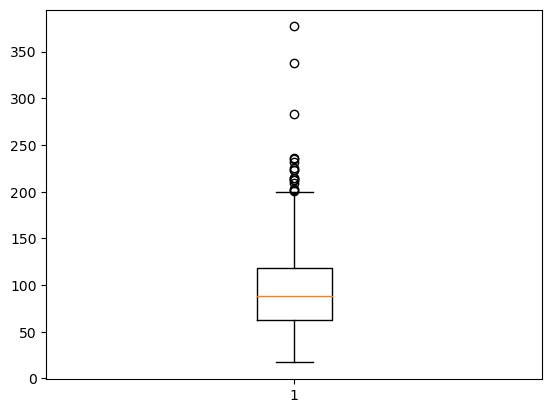

In [15]:
plt.boxplot(fix_lengths)

In [1]:
import numpy as np
from scipy.spatial.distance import cdist

In [3]:
img_size = 512
col, row = np.meshgrid(np.arange(img_size), np.arange(img_size))
coord = np.stack((col, row), axis=2).reshape(-1, 2) / img_size
dist = cdist(coord, coord)  # compute distance between every pair of pixels
sigma = 0.05 * np.pi  # width of the Gaussian (can be a hyperparameter while training a model)
A = np.exp(-dist / sigma ** 2)  # adjacency matrix of spatial similarity
A[A < 0.01] = 0  # suppress values less than 0.01
A = torch.from_numpy(A).float()

 # Normalization as per (Kipf & Welling, ICLR 2017)
D = A.sum(1)  # nodes degree (N,)
D_hat = (D + 1e-5) ** (-0.5)
A_hat = D_hat.view(-1, 1) * A * D_hat.view(1, -1)  # N,N

# Some additional trick I found to be useful
A_hat[A_hat > 0.0001] = A_hat[A_hat > 0.0001] - 0.2
print(A_hat[:10, :10])

In [6]:
coord.shape

(262144, 2)

In [7]:
512*512

262144

In [3]:
col.shape

(512, 512)

In [4]:
row.shape

(512, 512)